In [6]:
my_dict = {"사과" : 10, "바나나" : 5, "체리": 8}
# 새로운 상품 추가
my_dict["포도"] = 12
print(f"my_dict 추가 출력1 : {my_dict}")
# 특정 상품의 재고 변경
my_dict["사과"] = 5
print(f"my_dict 재고 변경 출력2 : {my_dict}")
# 특정 상품 삭제
del my_dict["체리"]
print(f"my_dict 체리 삭제 출력3 : {my_dict}")
# 전체 상품 목록 조회
print(f"my_dict 전체 상품 목록 조회 출력4 : {my_dict}")
# 특정 상품 검색
search_item = "포도"
if search_item in my_dict:
    print(f" my_dict 검색 출력5'{search_item}'가 딕션너리에 존재합니다. 수량 : {my_dict[search_item]}")
else:
    print(f" my_dict 검색 출력5'{search_item}'가 딕션너리에 없습니다.")


my_dict 추가 출력1 : {'사과': 10, '바나나': 5, '체리': 8, '포도': 12}
my_dict 재고 변경 출력2 : {'사과': 5, '바나나': 5, '체리': 8, '포도': 12}
my_dict 체리 삭제 출력3 : {'사과': 5, '바나나': 5, '포도': 12}
my_dict 전체 상품 목록 조회 출력4 : {'사과': 5, '바나나': 5, '포도': 12}
 my_dict 검색 출력5'포도'가 딕션너리에 존재합니다. 수량 : 12


In [9]:
# 1부터 10까지 숫자의 제곱을 포함하는 리스트를 리스트 컴프리헨션을 사용하여 생성하세요
# (결과물 , 콘솔 출력)
squares = [x**2 for x in range(1, 11)]
print(squares)  # [1, 4, 9, 16, 25]


[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [87]:
# 도서 관리 시스템 (상속 및 다형성 활용)
# 도서 Book , 전자책 EBook, 종이책 PaperBook 클래스를 구현하고,
# display_info() 메서드를 다형성을 적용하여 다르게 동작하도록 만드세요.
# 참고,
# (def   init  (self, title, author):,
# # 객체 생성, # 정보 출력
# (결과물 , 콘솔 출력)

class Book:
    def  __init__  (self, title, author):
        self.title = title
        self.author = author

    def display_info(self):
        print(f"제목: {self.title}, 저자: {self.author}")
        pass

class EBook(Book):
    def display_info(self):
        return f"EBook {self.title} 전자책은 현재 대여 가능합니다"

class PaperBook(Book):
    def display_info(self):
        return f"PaperBook {self.title} 종이책은 현재 대여중 입니다"

cart_book = Book("생활의 달인", "유영준")
cart_book.display_info()


books = [
    EBook(cart_book.title, cart_book.author),
    PaperBook(cart_book.title, cart_book.author),
]

for book in books:
    print(f"대여 가능여부: {book.display_info()}")

제목: 생활의 달인, 저자: 유영준
대여 가능여부: EBook 생활의 달인 전자책은 현재 대여 가능합니다
대여 가능여부: PaperBook 생활의 달인 종이책은 현재 대여중 입니다


In [91]:
# 4
# 주식 데이터(삼성전자, 카카오, 네이버) 를 활용하여 주가 변동을 시각화.
# Numpy, Matplotlib, Pandas를 활용하여 다음을 분석합니다
# 1) 주가 변동 라인 그래프
# 삼성전자, 카카오, 네이버의 주가 변동을 하나의 그래프로 시각화
# 1) 이동 평균선 추가
# 단기(20일) 및 장기(60일) 이동 평균선을 추가하여 주가 추세를 분석
#
# 2) 히트맵을 통한 상관관계 분석
# 삼성전자, 카카오, 네이버의 주가 상관관계를 히트맵으로 표현
# - 주식 데이터 수집 및 처리
# 삼성전자(005930), 카카오(035720), 네이버(035420)의 주가 데이터를 가져오기.
# - 데이터 전처리
# 수집한 데이터에서 종가(close) 정보를 추출하고, 이를 하나의 데이터프레임으로 결과
#
# - 주가 변동 시각화
# 각 기업의 주가 변동을 라인 그래프로 시각화
#
# - 이동 평균선 추가
# 주가의 단기 및 장기 추세를 파악하기 위해 20일 및 60일 이동 평균선을 계산하고 시각화
#
# - 종목 간 상관관계 분석
# 각 종목 간 주가의 상관관계를 히트맵으로 시각화
!pip install yfinance
import time
import pandas as pd
import requests

from yahoo_fin import stock_info as si
import yfinance as yf

# ---------------------------
# 1. 종목 코드 설정
# ---------------------------
tickers = {
    '삼성전자': '005930.KS',
    '네이버'  : '035420.KS',
    '카카오'  : '035720.KS'
}

# 헤더 (야후 차단 방지용)
HEADERS = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
        "AppleWebKit/537.36 (KHTML, like Gecko) "
        "Chrome/124.0.0.0 Safari/537.36"
    )
}

# ---------------------------
# 2. 데이터 수집 함수
# ---------------------------
def get_data_yahoo_fin(ticker, start, end, headers=None):
    return si.get_data(
        ticker,
        start_date=start,
        end_date=end,
        index_as_date=True,
        interval="1d",
        headers=headers
    )

def get_data_yfinance(ticker, start, end):
    df = yf.download(
        ticker,
        start=start,
        end=end,
        progress=False,
        auto_adjust=True,
        threads=False
    )
    if df is not None and not df.empty:
        df = df.rename(columns={
            "Open": "open",
            "High": "high",
            "Low": "low",
            "Close": "close",
            "Adj Close": "adjclose",
            "Volume": "volume"
        })
    return df

def get_data_safe(ticker, start="2022-01-01", end="2025-01-01",
                  retries=3, backoff=2.0, headers=HEADERS):
    last_exc = None
    for i in range(retries):
        try:
            df = get_data_yahoo_fin(ticker, start, end, headers=headers)
            if df is not None and not df.empty:
                return df
        except Exception as e:
            last_exc = e
        time.sleep(backoff * (i + 1))
    # 폴백
    df_fb = get_data_yfinance(ticker, start, end)
    if df_fb is not None and not df_fb.empty:
        return df_fb
    raise RuntimeError(f"Failed to fetch {ticker}") from last_exc

# ---------------------------
# 3. 데이터 수집 및 CSV 저장
# ---------------------------
all_data = {}

for company, ticker in tickers.items():
    try:
        df = get_data_safe(ticker, start="2022-01-01", end="2025-09-01")
        df["company"] = company  # 회사명 컬럼 추가
        all_data[company] = df
        print(f"[OK] {company} ({ticker}) rows={len(df)}")
        time.sleep(0.7)
    except Exception as e:
        print(f"[FAIL] {company} ({ticker}) -> {e}")

# 하나의 DataFrame으로 합치기
combined = pd.concat(all_data.values())
combined.index.name = "date"

# CSV 저장
csv_path = "stock_data.csv"
combined.to_csv(csv_path, encoding="utf-8-sig")
print(f"CSV 저장 완료: {csv_path}")

# ---------------------------
# 4. 저장된 CSV 불러오기
# ---------------------------
loaded = pd.read_csv(csv_path, parse_dates=["date"])
print("불러온 데이터 크기:", loaded.shape)
print(loaded.head())


[OK] 삼성전자 (005930.KS) rows=895
[OK] 네이버 (035420.KS) rows=895
[OK] 카카오 (035720.KS) rows=895
CSV 저장 완료: stock_data.csv
불러온 데이터 크기: (2685, 9)
        date     open     high      low    close      adjclose    volume  \
0 2022-01-04  78800.0  79200.0  78300.0  78700.0  72762.875000  12427416   
1 2022-01-05  78800.0  79000.0  76400.0  77400.0  71560.953125  25470640   
2 2022-01-06  76700.0  77600.0  76600.0  76900.0  71098.656250  12931954   
3 2022-01-07  78100.0  78400.0  77400.0  78300.0  72393.062500  15163757   
4 2022-01-10  78100.0  78100.0  77100.0  78000.0  72115.695312   9947422   

      ticker company  
0  005930.KS    삼성전자  
1  005930.KS    삼성전자  
2  005930.KS    삼성전자  
3  005930.KS    삼성전자  
4  005930.KS    삼성전자  


In [92]:

# CSV에서 불러온 데이터 활용
# (loaded는 [date, open, high, low, close, adjclose, volume, company] 구조)

# pivot_table 또는 pivot 사용
close_prices = loaded.pivot(index="date", columns="company", values="close")
# 결과 확인
print(close_prices.head())

# 빈 DataFrame 생성
close_prices_alt = pd.DataFrame()

# company별로 close만 추출해 열 단위로 추가
for company in tickers.keys():
    company_df = loaded[loaded["company"] == company]
    close_prices_alt[company] = company_df.set_index("date")["close"]

# 결과 확인
print(close_prices_alt.head())

company          네이버     삼성전자       카카오
date                                   
2022-01-04  365500.0  78700.0  111500.0
2022-01-05  355000.0  77400.0  105500.0
2022-01-06  338500.0  76900.0  100000.0
2022-01-07  338000.0  78300.0  100000.0
2022-01-10  335000.0  78000.0   96600.0
               삼성전자       네이버       카카오
date                                   
2022-01-04  78700.0  365500.0  111500.0
2022-01-05  77400.0  355000.0  105500.0
2022-01-06  76900.0  338500.0  100000.0
2022-01-07  78300.0  338000.0  100000.0
2022-01-10  78000.0  335000.0   96600.0


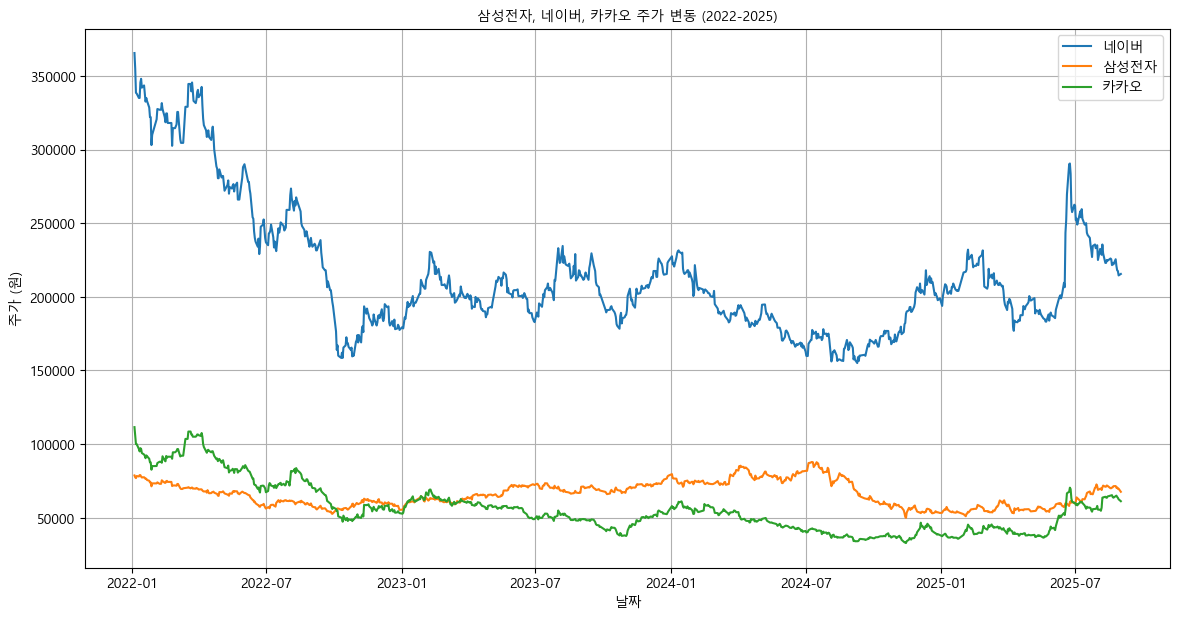

In [93]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 한글 폰트 경로 설정 (Windows)
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로

font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(14, 7))
for company in close_prices.columns:
    plt.plot(close_prices.index, close_prices[company], label=company)

plt.title('삼성전자, 네이버, 카카오 주가 변동 (2022-2025)', fontproperties=font_prop)
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('주가 (원)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()

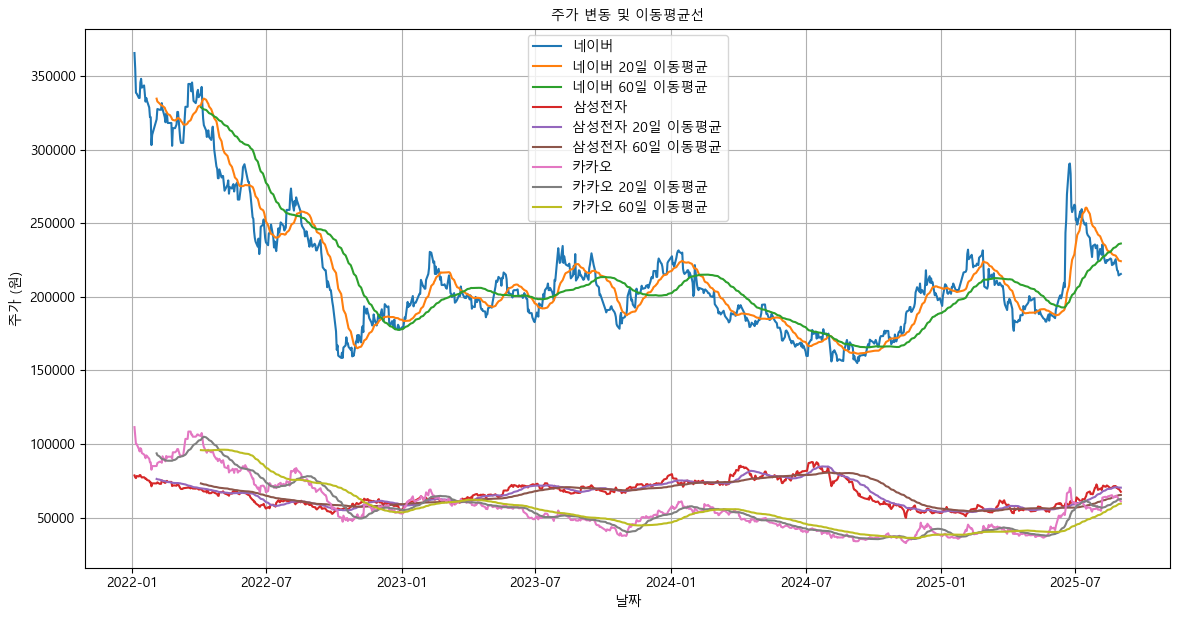

In [94]:
# 이동 평균선 계산
ma_days = [20, 60]
for ma in ma_days:
    for company in close_prices.columns:
        column_name = f'{company} {ma}일 이동평균'
        close_prices[column_name] = close_prices[company].rolling(window=ma).mean()

# 시각화
plt.figure(figsize=(14, 7))
for company in close_prices.columns[:3]:
    plt.plot(close_prices.index, close_prices[company], label=company)
    for ma in ma_days:
        plt.plot(close_prices.index, close_prices[f'{company} {ma}일 이동평균'],
                 label=f'{company} {ma}일 이동평균')

plt.title('주가 변동 및 이동평균선', fontproperties=font_prop)
plt.xlabel('날짜', fontproperties=font_prop)
plt.ylabel('주가 (원)', fontproperties=font_prop)
plt.legend(prop=font_prop)
plt.grid(True)
plt.show()

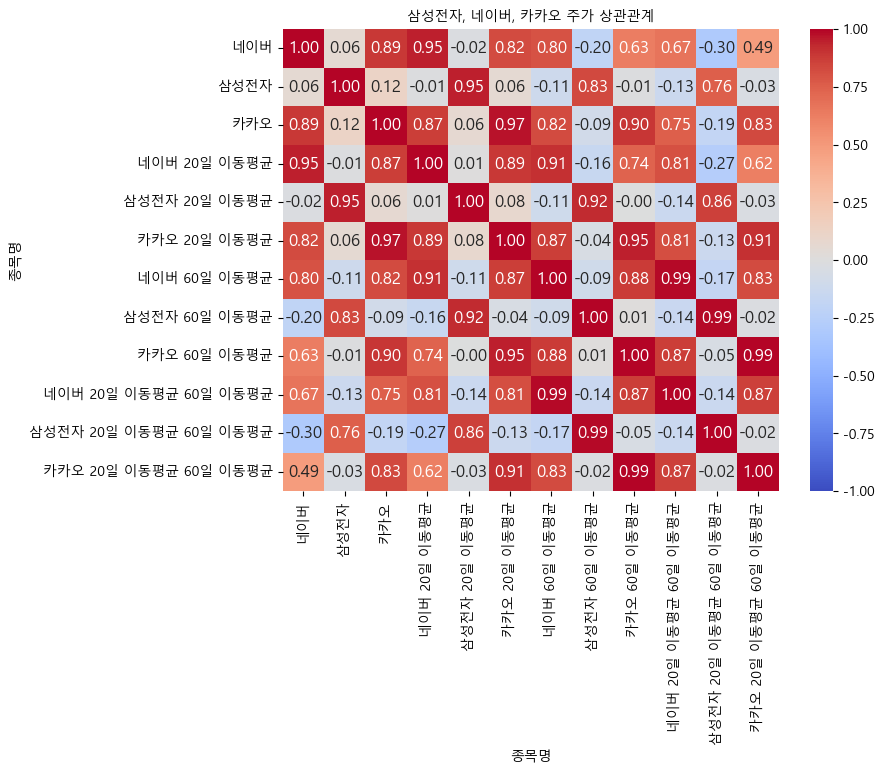

In [95]:
# 📌 종가 데이터의 상관계수 계산
corr = close_prices.corr()

# 📌 히트맵 시각화 (한글 폰트 적용)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1,
            annot_kws={"fontsize": 12, "fontproperties": font_prop}, fmt=".2f")

# 📌 그래프 제목 및 축 레이블 한글 적용
plt.title("삼성전자, 네이버, 카카오 주가 상관관계", fontproperties=font_prop)
plt.xlabel("종목명", fontproperties=font_prop)
plt.ylabel("종목명", fontproperties=font_prop)

plt.show()